In [12]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

import numpy as np
import os

import threading

In [13]:
def plot_dropped_packet_vs_time(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
   
    droppedvstime = {}
    
    with open("{0}_{1}_{2}/bottleneck_monitor_attr".format(flavor, noOfSource, RTT), "r") as f2:
        lines = f2.readlines();
               
        
        for line in lines:
            split_line = line.split()
            droppedvstime[float(split_line[1])] = float(split_line[9])
            
        plt.xlabel("time")
        plt.ylabel("dropped packets")   
        
        droppedvstime_keys_list = [];
        
        for k in droppedvstime.keys():
            droppedvstime_keys_list.append(k);
            
        droppedvstime_values_list = [];
        
        v_old = 0;
        for v in droppedvstime.values():
            droppedvstime_values_list.append(v-v_old);
            # comment the following line to make the graph cumulative
            v_old = v;
            
        plt.title("dropped packets vs time Sources - {0} RTT - {1}".format(noOfSource, RTT))
        plt.plot(droppedvstime_keys_list, droppedvstime_values_list, label="dropped packets")

    f2.close()  

In [14]:
def plot_qutilization_vs_time(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
   
    qutilizationvstime = {}
    
    with open("{0}_{1}_{2}/bottleneck_monitor_attr".format(flavor, noOfSource, RTT), "r") as f2:
        lines = f2.readlines();
               
        
        for line in lines:
            split_line = line.split()
            qutilizationvstime[float(split_line[1])] = float(split_line[-1])
            
        plt.xlabel("time")
        plt.ylabel("qutilization %")   
        
        qutilizationvstime_keys_list = [];
        
        for k in qutilizationvstime.keys():
            qutilizationvstime_keys_list.append(k);
            
        qutilizationvstime_values_list = [];
        

        for v in qutilizationvstime.values():
            qutilizationvstime_values_list.append(v);
            
        
        plt.title("queue utilization vs time Sources - {0} RTT - {1}".format(noOfSource, RTT))
        
        plt.plot(qutilizationvstime_keys_list, qutilizationvstime_values_list, label="qutitlization")

    f2.close()  

In [15]:
def plot_qsize_vs_time(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
   
    qsizevstime = {}
    
    with open("{0}_{1}_{2}/bottleneck_monitor_attr".format(flavor, noOfSource, RTT), "r") as f2:
        lines = f2.readlines();
               
        
        for line in lines:
            split_line = line.split()
            qsizevstime[float(split_line[1])] = float(split_line[3])
            
        plt.xlabel("time")
        plt.ylabel("qsize packets")   
        
        qsizevstime_keys_list = [];
        
        for k in qsizevstime.keys():
            qsizevstime_keys_list.append(k);
            
        qsizevstime_values_list = [];
        

        for v in qsizevstime.values():
            qsizevstime_values_list.append(v);
            
            
        
        plt.title("queue size vs time Sources - {0} RTT - {1}".format(noOfSource, RTT))
        plt.plot(qsizevstime_keys_list, qsizevstime_values_list, label="dropped packets")

    f2.close()  

In [16]:
def plot_cwnd_vs_time(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
           
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    

    for i in range(noOfSource):
        
        cwndvstime = {}
        
        with open("{0}_{2}_{3}/tcp_{0}_{1}".format(flavor, i, noOfSource, RTT), "r") as f:
            lines = f.readlines()

        for line in lines:
            split_line = line.split()
            cwndvstime[float(split_line[0])] = float(split_line[1]);

        
        plt.plot(cwndvstime.keys(), cwndvstime.values() , label = "{0}".format(i))
        plt.xlabel("time")
        plt.ylabel("cwnd")
        plt.title("Congestion windows size vs time Sources = {0} RTT = {1}ms.".format(noOfSource, RTT))
        f.close()
    
    
    with open("{0}_{1}_{2}/bottleneck_monitor_attr".format(flavor, noOfSource, RTT), "r") as f2:
        lines = f2.readlines();

In [17]:
def clean(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    os.system("rm -rf {}_{}_{}".format(flavor, noOfSource, RTT));

In [18]:
def main(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    flavor = flavor.capitalize()
    
    os.system("ns dumbell_tcp.tcl {0} {1} {2} {3} {4} {5} {6} {7}".format(flavor, time, queueL, noOfSource, total_input_bandwidth, bottleneck_bandwidth, RTT, recvWindow))
    plot_cwnd_vs_time(flavor = flavor, time = time, queueL = queueL, noOfSource = noOfSource, total_input_bandwidth = total_input_bandwidth, bottleneck_bandwidth= bottleneck_bandwidth, RTT = RTT, recvWindow = recvWindow)
    plot_dropped_packet_vs_time(flavor = flavor, time = time, queueL = queueL, noOfSource = noOfSource, total_input_bandwidth = total_input_bandwidth, bottleneck_bandwidth= bottleneck_bandwidth, RTT = RTT, recvWindow = recvWindow)
    plot_qsize_vs_time(flavor = flavor, time = time, queueL = queueL, noOfSource = noOfSource, total_input_bandwidth = total_input_bandwidth, bottleneck_bandwidth= bottleneck_bandwidth, RTT = RTT, recvWindow = recvWindow)
    plot_qutilization_vs_time(flavor = flavor, time = time, queueL = queueL, noOfSource = noOfSource, total_input_bandwidth = total_input_bandwidth, bottleneck_bandwidth= bottleneck_bandwidth, RTT = RTT, recvWindow = recvWindow)   
    
    #clean(flavor = flavor, time = time, queueL = queueL, noOfSource = noOfSource, total_input_bandwidth = total_input_bandwidth, bottleneck_bandwidth= bottleneck_bandwidth, RTT = RTT, recvWindow = recvWindow)   


In [19]:
# # Running multiple simulations

# RTTs = [10, 100, 200]
# sources = [1, 40]

# threads = []

# for rtt in RTTs:
#     for s in sources:
#         threads.append(threading.Thread(target=main, args=("bbr", 20, 2084, s, 120, 100, rtt, 10000)))
        
# for thread in threads:
#     thread.start()

# for thread in threads:
#     thread.join()

NS 0.000000 
0.000000	SEN	-1.000000	-1.000000	2.885000	2	5.770000	1	STARTUP
NS 0.000000 
0.000000	SEN	-1.000000	-1.000000	2.885000	2	5.770000	1	STARTUP
NS 0.000000 
0.000000	SEN	-1.000000	-1.000000	2.885000	2	5.770000	1	STARTUP
0.002037	ACK	502617.801047	-1.000000	2.885000	2	1450052.351228	0	STARTUP
NS 0.000690 
0.002037	SEN	502617.801047	-1.000000	2.885000	2	1450052.351228	1	STARTUP
0.004541	ACK	502617.801047	-1.000000	2.885000	2	1450052.351228	0	STARTUP
NS 0.000690 
0.004541	SEN	502617.801047	-1.000000	2.885000	2	1450052.351228	1	STARTUP
0.007045	ACK	502617.801047	-1.000000	2.885000	2	1450052.351228	0	STARTUP
NS 0.000690 
0.007045	SEN	502617.801047	-1.000000	2.885000	2	1450052.351228	1	STARTUP
0.009549	ACK	502617.801047	-1.000000	1.000000	2	502617.801047	0	PROBE_BW: 4
NS 0.001990 
0.009549	SEN	502617.801047	-1.000000	1.000000	2	502617.801047	1	PROBE_BW: 4
0.012053	ACK	502617.801047	-1.000000	1.000000	2	502617.801047	0	PROBE_BW: 5
NS 0.001990 
0.012053	SEN	502617.801047	-1.000000	1.00

Segmentation fault (core dumped)


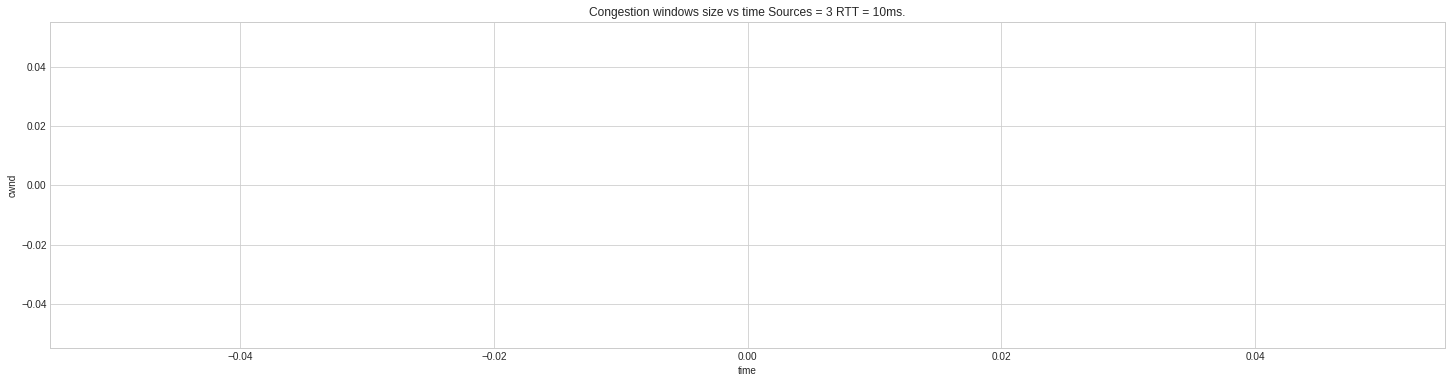

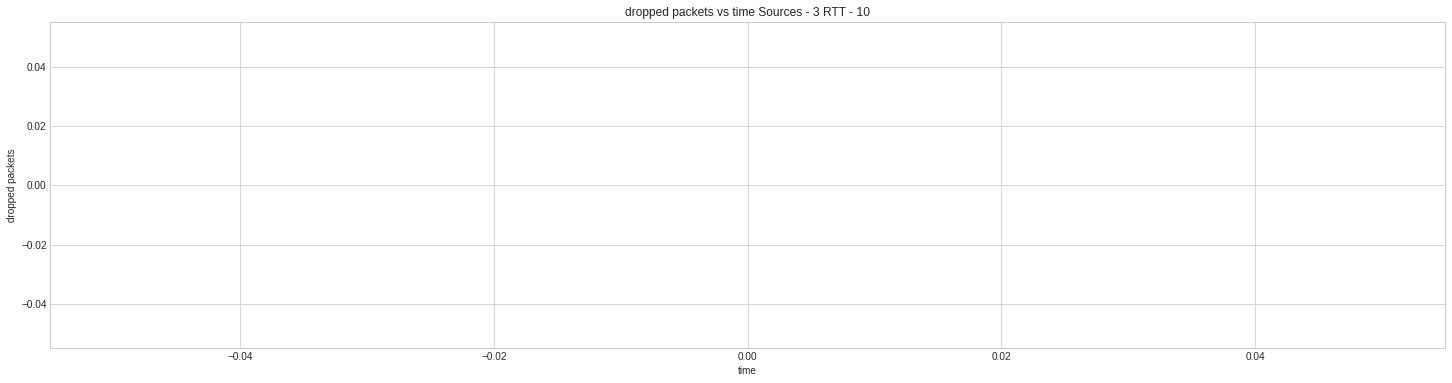

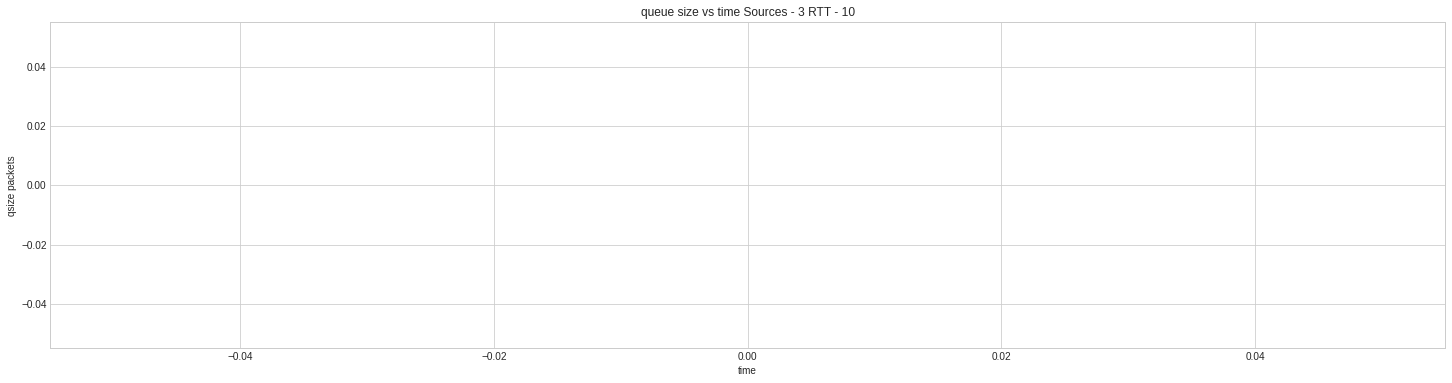

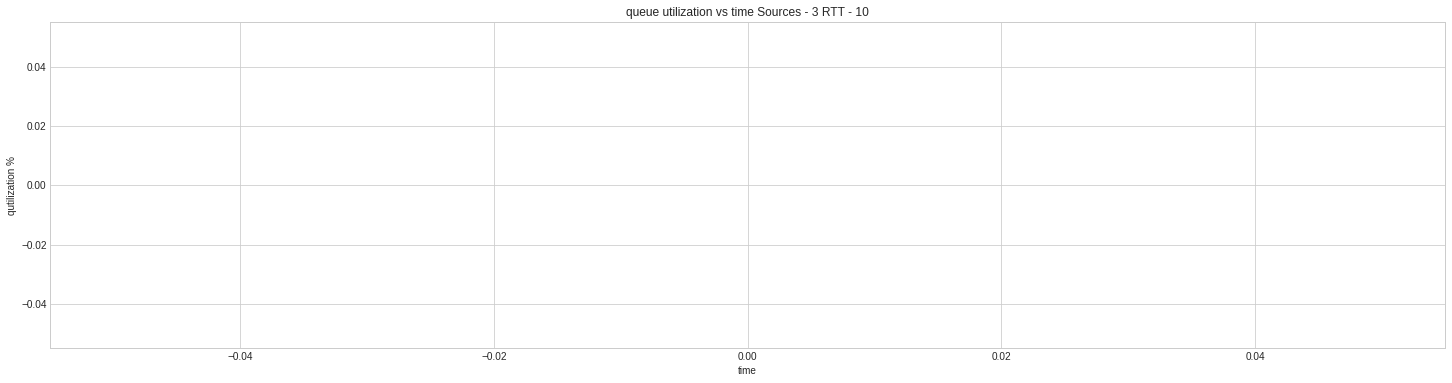

In [20]:
main(flavor = "bbr", time = 20, queueL = 2084, noOfSource = 3, total_input_bandwidth = 120, bottleneck_bandwidth= 120, RTT = 10, recvWindow = 10000)